# Estudo de caso e implementação de um RNA de camada simples para solução de problemas OR e XOR
 
## Yuri Dimitre Dias de Faria
 



Neste trabalho, iremos implementar uma Rede Neural Artificial de uma camada apenas para o problema OR e XNOR

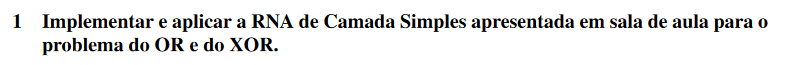

# Bibliotecas

In [49]:
import numpy as np
import matplotlib as plt
import random

# Definição da rede neural
Utilizaremos a função "step" para ativação dos neurônios. A função step e denotada por:
 
\begin{equation}
f(x)=
    \begin{cases}
    1, x>=0 \\
    0 , x < 0
    \end{cases}
\end{equation}
 
Usaremos o erro e a quantidade de épocas máximas para determinar a parada da minha RNA, tal que se o erro for menor que minha tolerância ou se minhas épocas chegaram na quantidade máxima o sistema irá parar.
 

In [50]:
class RNA:
  def __init__(self,entry,expected,learn_rate,tol=0.000001,max_epochs = 5):
    self.entry = entry
    self.weight =[random.random() for i in range(len(entry[0]))] 
    self.expected = expected
    self.bias = -0.5
    self.learn_rate = learn_rate
    assert(learn_rate < 1)
    self.tol = tol
    self.max_epochs = max_epochs
  def step(self,x):
    return 1.0 if x >= 0 else 0.0
  def calc(self,w,e,b):
    c = np.dot(w,e)+b
    return self.step(c)
  def run(self):
    erroepoca = 1+self.tol
    epoch = 0
    while(erroepoca > self.tol and epoch < self.max_epochs):
      print("Epoch:",epoch,"Weight: [%3.4f, %3.4f] " %(self.weight[0],self.weight[1]))
      out = []
      erroatual=0
      for i in range(len(self.entry)):
        y = self.calc(self.weight,self.entry[i],self.bias)
        out.append(y)
        err = self.expected[i] - y
        erroatual=erroatual+err*err
        self.weight[0] = self.weight[0]+self.learn_rate*err*self.entry[i][0]
        self.weight[1] = self.weight[1]+self.learn_rate*err*self.entry[i][1]
        print("%d %d %d" %(self.entry[i][0], self.entry[i][1], y))
      print("---------------------------------------------------------------")
      epoch+=1
      erroepoca = erroatual/4

# Definição da entrada

In [51]:
x = [[0,0],[0,1],[1,0],[1,1]]

# Definição  do resultado esperado (OR)

In [52]:
y = [0,1,1,1]

# Definição dos parametros do meu sistema (OR)
- learn rate
- tolerate error
- max epochs

In [53]:
l_rate = 0.1
tol = 0.000001
max_epochs = 10

# Instanciação e execução do sistema (OR)

In [54]:
p = RNA(x,y,l_rate,tol,max_epochs)
p.run()

Epoch: 0 Weight: [0.5491, 0.2546] 
0 0 0
0 1 0
1 0 1
1 1 1
---------------------------------------------------------------
Epoch: 1 Weight: [0.5491, 0.3546] 
0 0 0
0 1 0
1 0 1
1 1 1
---------------------------------------------------------------
Epoch: 2 Weight: [0.5491, 0.4546] 
0 0 0
0 1 0
1 0 1
1 1 1
---------------------------------------------------------------
Epoch: 3 Weight: [0.5491, 0.5546] 
0 0 0
0 1 1
1 0 1
1 1 1
---------------------------------------------------------------


# Definição do resultado esperado (XOR)

In [55]:
y = [0,1,1,0]

# Definição dos parametros do meu sistema (XOR)
- max epochs

In [56]:
max_epochs = 20

# Instanciação e execução do sistema (XOR)

In [57]:
p = RNA(x,y,l_rate,tol,max_epochs)
p.run()

Epoch: 0 Weight: [0.0086, 0.7867] 
0 0 0
0 1 1
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 1 Weight: [0.0086, 0.6867] 
0 0 0
0 1 1
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 2 Weight: [0.0086, 0.5867] 
0 0 0
0 1 1
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 3 Weight: [0.0086, 0.4867] 
0 0 0
0 1 0
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 4 Weight: [0.0086, 0.4867] 
0 0 0
0 1 0
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 5 Weight: [0.0086, 0.4867] 
0 0 0
0 1 0
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 6 Weight: [0.0086, 0.4867] 
0 0 0
0 1 0
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 7 Weight: [0.0086, 0.4867] 
0 0 0
0 1 0
1 0 0
1 1 1
---------------------------------------------------------------
Epoch: 8 Weight:

Como podemos notar, foi possível a aproximação da função OR mas não dá XOR. Isso se deve graças a função XOR não ser linearmente separável, o que torna impossível a aproximação em uma RNA de camada simples.

